# Урок 16

## Задача T1 ― «Временные отметки логов»

Файл log.txt содержит строки вида:

    1:03 - OK  
    
    1:05 - FAIL  
    
    1:07 - OK  
    
    ...

Задание:

    Прочитайте файл и составьте список или словарь всех отметок времени для ошибок (FAIL).
     
    Создайте файл fails.txt в котором будут записаны часы и кол-во ошибок за этот час в формате:

        hour error_counter

        1:00-1:59 5
        
        2:00-2:59 4
        
        3:00-3:59 5
        
        ...

In [12]:
file_base_1 = "B:/Python projects/Python-Training/Files/l_16/log.txt"
file_base_2 = "B:/Python projects/Python-Training/Files/l_16/fails.txt"

fail_time = []
fail_time_counts = {}

OK_counter = 0
FAIL_counter = 0
with open(file_base_1, 'r') as file:
    for line in file:
        if "FAIL" in line:
            fail_time.append(line.split()[0])
            time = fail_time[-1].split(":")[0] + ":00-" + fail_time[-1].split(":")[0] + ":59"
            try:
                fail_time_counts[time] += 1
            except:
                fail_time_counts[time] = 1

with open(file_base_2, 'w') as file:
    for info in list(fail_time_counts.items()):
         file.write(info[0] + " " + str(info[1])) 

### Решение

In [11]:
file_path = "B:/Python projects/Python-Training/Files/L_16/log.txt"

logs_errors = {}

with open(file_path, 'r') as file:
    for line in file:
        if "FAIL" in line:
            time = line.split()[0].split(":")[0] + ":00-" + line.split()[0].split(":")[0] + ":59"
            try:
                logs_errors[time] += 1
            except:
                logs_errors[time] = 1

data_fails = list(logs_errors.items())

new_file_path = "B:/Python projects/Python-Training/Files/L_16/fails.txt"

with open(new_file_path, 'w') as file:
    file.write("hour error_counter\n")
    for data in data_fails:
        file.write(data[0] + " " + str(data[1]) + "\n")   

## Задача T2 ― «Покупки и сумма заказов»

Файл orders.txt:

    Аня: молоко,хлеб,сыр
    
    Борис: сыр,хлеб
    
    Вика: молоко,молоко,сыр
    
    ...

Файл prices.txt:

    молоко:60  
    
    хлеб:30  
    
    сыр:100

    ...
    
Задание:

    Составьте словарь цен {продукт: цена}
    
    Прочитайте файл заказов и создайте словарь {имя: список товаров}
    
    Посчитайте, сколько потратил каждый покупатель.
    
    Постройте bar-график, с именами людей и кол-вом денег которые они потратили на заказ.

<BarContainer object of 8 artists>

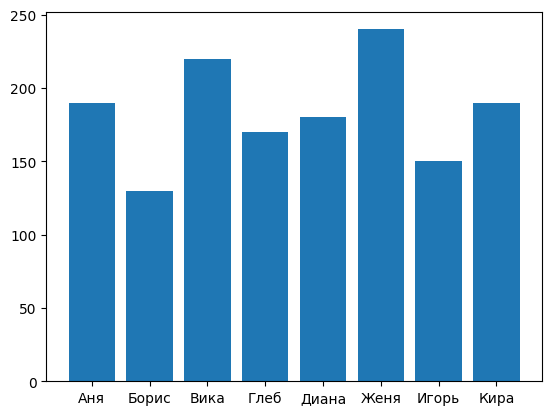

In [28]:
import matplotlib.pyplot as plt

file_path_1 = "B:/Python projects/Python-Training/Files/l_16/prices.txt"
file_path_2 = "B:/Python projects/Python-Training/Files/l_16/orders.txt"
prices = {}
orders = {}
sum_orders = {}

with open(file_path_1, 'r', encoding='utf-8') as file:
    for line in file:
        prices[line.split(":")[0]] = int(line.split(":")[1][:-1])

with open(file_path_2, 'r', encoding='utf-8') as file:
    for line in file:
        orders[line.split(":")[0]] = line.split(":")[1][:-1]
        sum_orders[line.split(":")[0]] = 0
        for thing in line.split(":")[1][1:-1].split(","):
            sum_orders[line.split(":")[0]] += prices[thing]

plt.bar(list(sum_orders), list(sum_orders.values()))

### Решение

<BarContainer object of 8 artists>

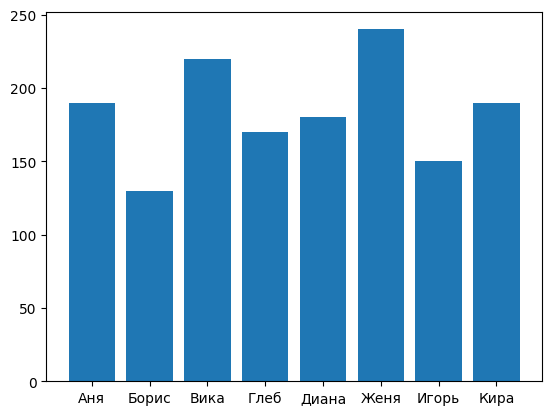

In [2]:
import matplotlib.pyplot as plt

file_path1 = "B:/Python projects/Python-Training/Files/L_16/orders.txt"
file_path2 = "B:/Python projects/Python-Training/Files/L_16/prices.txt"

prices = {}
orders = {}

with open(file_path1, 'r', encoding='utf-8') as file:
    for line in file:
        orders[line.split(":")[0]] = line.split()[1]

with open(file_path2, 'r', encoding='utf-8') as file:
    for line in file:
        prices[line.split(":")[0]] = line.split(":")[1][:-1]

names = []
costs = []

for order in list(orders.items()):
    cost = 0
    for thing in order[1].split(","):
        cost += int(prices[thing])
    names.append(order[0])
    costs.append(cost)

plt.bar(names, costs)

### Решение

## Задача S2 ― «Отбор уникальных значений»

Файл orders.txt:

    Аня: молоко,хлеб,сыр
    
    Борис: сыр,хлеб
    
    Вика: молоко,молоко,сыр
    
    ...
    
Файл prices.txt:

    молоко:60  
    
    хлеб:30  
    
    сыр:100
    
    ...

Задание:

    Прочитай оба файла.
    
    Создай словарь, где ключ — название товара (например, "молоко", "сыр"), а значение — общее сумма на которую её купили другие участники.
    
    Выведи все товары и сумму потраченную на них.
    
    Найди товар с самых высоким объёмом продаж и выведите его.

In [52]:
file_orders = "B:/Python projects/Python-Training/Files/l_16/orders.txt"
file_prices = "B:/Python projects/Python-Training/Files/l_16/prices.txt"

orders = {}
prices = {}
goods = {}

with open(file_prices, 'r' , encoding='utf-8')  as file:
    for line in file:
        prices[line.split(":")[0]] = int(line.split(":")[1][:-1])
        goods[line.split(":")[0]] = 0

with open(file_orders, 'r' , encoding='utf-8')  as file:
    for line in file:
        orders[line.split(":")[0]] = line.split(":")[1][1:-1]

orders_ls = (list(orders.values()))
for line in orders_ls:
    line_split = line.split(",")
    for thing in line_split:
        goods[thing] += prices[thing]
print(goods)
        

{'молоко': 360, 'хлеб': 120, 'сыр': 600, 'масло': 270, 'яйца': 120}


### Решение

In [17]:
import matplotlib.pyplot as plt

file_path1 = "B:/Python projects/Python-Training/Files/L_16/orders.txt"
file_path2 = "B:/Python projects/Python-Training/Files/L_16/prices.txt"

prices = {}
orders = {}

with open(file_path1, 'r', encoding='utf-8') as file:
    for line in file:
        orders[line.split(":")[0]] = line.split()[1]

with open(file_path2, 'r', encoding='utf-8') as file:
    for line in file:
        prices[line.split(":")[0]] = line.split(":")[1][:-1]

thing_cost = {}

for order in list(orders.items()):
    for thing in order[1].split(","):
        try:
            thing_cost[thing] += int(prices[thing])
        except:
            thing_cost[thing] = int(prices[thing])

print(thing_cost)
for thing in thing_cost:
    if thing_cost[thing] == max(list(thing_cost.values())):
        print(thing)

{'молоко': 360, 'хлеб': 120, 'сыр': 600, 'яйца': 120, 'масло': 270}
сыр
